In [12]:
import numpy as np
import pandas as pd
import pickle
import csv
import os
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from tqdm import tqdm
np.random.seed(42)

In [2]:
def loaddata():
    Location = r'graphwithwayid.csv'
    df = pd.read_csv(Location)
    return df

In [3]:
data=loaddata()

In [4]:
data

,edgeId,startNode,endNode,latStart,lonStart,latEnd,lonEnd,distance,maxSpeed,random,type
0,36077,21700,9337,34.228694,108.908869,34.228099,108.910196,138.821,55.0,266773682,primary
1,36076,9337,7628,34.228099,108.910196,34.226947,108.912766,268.743,55.0,266773682,primary
2,36075,7646,7628,34.226900,108.912872,34.226947,108.912766,11.103,55.0,266773682,primary
3,36074,88686,7646,34.225077,108.916994,34.226900,108.912872,429.800,55.0,266773682,primary
4,36073,88686,17078,34.225077,108.916994,34.224484,108.918338,140.079,55.0,266773682,primary
...,...,...,...,...,...,...,...,...,...,...,...
5441,6764,92368,12387,34.243777,108.983010,34.243777,108.982233,71.464,20.0,148314489,service
5442,92326,99975,21830,34.276687,108.930430,34.276336,108.930438,39.027,30.0,449218907,residential
5443,14107,92773,12298,34.207739,108.919246,34.208047,108.920610,160.572,30.0,212724373,residential
5444,7179,92374,6680,34.244892,108.976033,34.244866,108.976214,16.889,20.0,148910934,service


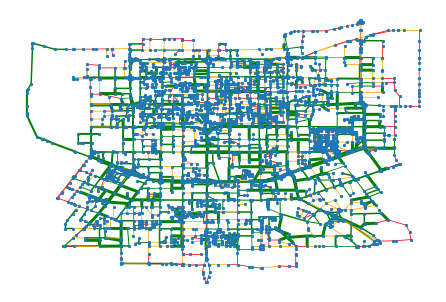

In [13]:
pos={}
colors=[]
widths=[]
for index, row in data.iterrows():
    pos.update( {row.startNode : (row.lonStart,row.latStart)})
    pos.update({row.endNode : (row.lonEnd,row.latEnd)})
    if row.maxSpeed>49:
        colors.append('green')
    elif row.maxSpeed>27:
        colors.append('orange')
    elif row.maxSpeed>=5:
        colors.append('red')
    else:
        colors.append('k')
    if row.type == 'primary':
        widths.append(3.0)
    elif row.type == 'secondary':
        widths.append(1.5)
    elif row.type == 'tertiary':
        widths.append(1.0)
    elif row.type == 'trunk':
        widths.append(2.0)
    else:
        widths.append(0.75)
G = nx.from_pandas_edgelist(data, source='startNode', target='endNode',edge_attr=True)


 # Plot it
nx.draw(G,pos=pos,node_size=5,width=widths,edge_color=colors, with_labels=False)
plt.show()

In [6]:
def loadavgspeed():
    Location = r'avg_speed.csv'
    df = pd.read_csv(Location)
    return df

In [7]:
avgs_df = loadavgspeed()
avgs_df

,Date,36077,36076,36075,36074,36073,1787,1788,1789,629,...,7555,6999,6998,6997,6996,6995,6994,6993,6992,6991
0,2016-10-01 00:00:00,26.645847,29.866911,33.271252,12.400981,29.755136,25.331384,26.135905,24.146141,29.235530,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,26.745726
1,2016-10-01 00:05:00,26.645847,29.866911,33.271252,12.400981,29.755136,25.331384,26.135905,24.146141,29.235530,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,26.745726
2,2016-10-01 00:10:00,26.645847,31.312142,32.536006,18.297457,25.761089,25.172837,26.899342,27.237150,27.291640,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,26.745726
3,2016-10-01 00:15:00,28.433848,31.940580,34.982730,30.414352,26.695148,28.117314,27.309331,30.107555,31.471561,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,26.745726
4,2016-10-01 00:20:00,29.465798,31.497171,28.642274,23.739149,29.563408,29.725141,19.962183,26.036904,27.950060,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,26.745726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,2016-12-01 23:40:00,28.333556,30.676558,31.304840,26.312535,16.606201,34.377965,14.931809,21.376463,22.778929,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,1.349944
17853,2016-12-01 23:45:00,23.703812,29.500672,33.425209,27.402852,27.737653,28.016733,18.965646,22.034825,24.032095,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,1.349944
17854,2016-12-01 23:50:00,27.450430,35.146966,30.392833,21.529443,22.455883,33.499492,26.065737,24.834020,24.884134,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,1.349944
17855,2016-12-01 23:55:00,22.122761,25.437807,33.683522,19.037640,20.675310,29.821635,23.788555,30.111006,25.913666,...,13.499435,12.149492,10.799548,9.449605,8.099661,6.749718,5.399774,4.049831,2.699887,1.349944


In [8]:
time_dict = {}
avgs_node = {}
avgs_df = loadavgspeed()
dates=avgs_df['Date']
avgs_df=avgs_df.drop('Date',axis=1)
for index, row in avgs_df.iterrows():
    time_dict.update({dates[index]: row })

In [20]:
def speedtocolor(date):
    speed=time_dict[date]
    keys=speed.keys()
    c=[]
    df=data['edgeId'].tolist()
    for i in keys:
        if int(i) in df:
            if speed.get(i)>49:
                c.append('green')
            elif speed.get(i)>27:
                c.append('orange')
            elif speed.get(i)>=5:
                c.append('red')
            else:
                c.append('k')
#     print(speed.get('0',default=-1))
    return c

In [21]:
c=speedtocolor('2016-10-01 00:50:00')

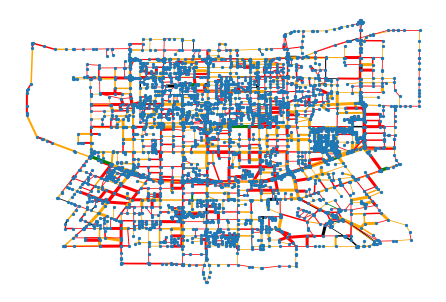

In [22]:
G = nx.from_pandas_edgelist(data, source='startNode', target='endNode',edge_attr=True)


 # Plot it
nx.draw(G,pos=pos,node_size=5,width=widths,edge_color=c, with_labels=False)
plt.show()